## Минимизация гладкой функции

In [43]:
from math import sin, exp

def smooth_func(x):
    return sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.)

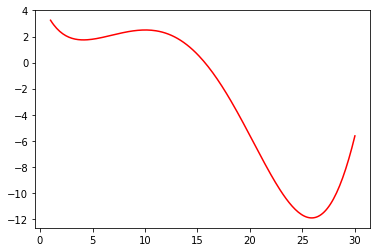

In [44]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.)
x = np.linspace(1, 30, 200)
y = map(f, x)
plt.plot(x, y, 'r')
plt.show()

In [49]:
from scipy import optimize

res_1 = optimize.minimize(smooth_func, 2, method='BFGS')
print round(res_1.fun, 2)
result = str("{0:,.2f}".format(res_1.fun))
res_2 = optimize.minimize(smooth_func, 30, method='BFGS')
print res_2
result += ' ' + str("{0:,.2f}".format(res_2.fun))
f = open('submission-1.txt', 'w')
f.write(result)
f.close()

1.75
      fun: -11.898894665981322
 hess_inv: array([[ 1.67940841]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 25.880193])


## Глобальная оптимизация

In [50]:
res_3 = optimize.differential_evolution(smooth_func, [(1,30)])
print res_3

     fun: -11.898894665981205
     jac: array([  3.55271368e-07])
 message: 'Optimization terminated successfully.'
    nfev: 66
     nit: 3
 success: True
       x: array([ 25.88019366])


In [51]:
f = open('submission-2.txt', 'w')
f.write(str("{0:,.2f}".format(res_3.fun)))
f.close()

## Минимализация негладкой функции

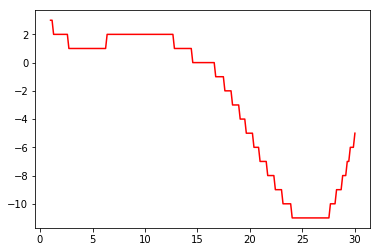

In [52]:
def not_smooth_func(x):
    return int(sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.))

x = np.linspace(1, 30, 200)
y = map(not_smooth_func, x)
plt.plot(x, y, 'r')
plt.show()

In [61]:
res_BFGS = optimize.minimize(not_smooth_func, 30, method='BFGS')
print res_BFGS

      fun: -5
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])


In [56]:
res_dif_evol = optimize.differential_evolution(not_smooth_func, [(1,30)])
print res_dif_evol


     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([ 24.61304933])


In [57]:
f = open('submission-3.txt', 'w')
f.write(str(res_BFGS.fun) + ' ' + str(res_dif_evol.fun))
f.close()